## Monte Carlo Simulation for pi

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

def plot_density(samples, hbins=30, sample_range=[0,1]):
    hbins = 30
    counts, bin_edges = np.histogram(samples, bins=hbins, range=sample_range)
    bin_width = bin_edges[1] - bin_edges[0]
    density = (counts / len(samples)) / bin_width
    plt.bar(bin_edges[:-1] + bin_width/2, density, width=bin_width*.8);
    return plt.gca(), bin_edges  # ax

In [14]:
N = 100_000  # num of samples
X = np.random.uniform(-1, 1, size=(N,2))
d = np.sum(X**2, axis=1)
d = (d <= 1).astype(float)

pi4hat = d.mean()
std = d.std()
se  = d.std() / np.sqrt(N)
e = pi4hat - np.pi/4

print(f"pi_hat= {pi4hat}")
print(f"pi_hat= {pi4hat*4}")
print(f"std=    {std}")
print(f"se =    {se}")
print(f"|pi_hat - pi/4|={e}")


pi_hat= 0.78689
pi_hat= 3.14756
std=    0.409504734893261
se =    0.0012949676748861337
|pi_hat - pi/4|=0.0014918366025516994


In [18]:
def mcpi(N=100_000):
    N = 100_000  # num of samples
    X = np.random.uniform(-1, 1, size=(N,2))
    d = np.sum(X**2, axis=1)
    d = (d <= 1).sum()
    return d / N 

Nrepeat = 1000
s = np.array([mcpi() for _ in range(Nrepeat)]);

0.78542425 0.7853981633974483 2.608660255176698e-05


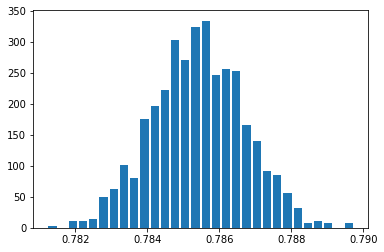

In [33]:
plot_density(s, sample_range=[s.min(), s.max()]);
print(s.mean(), np.pi/4, s.mean() - np.pi/4)

0.0012772768836473952


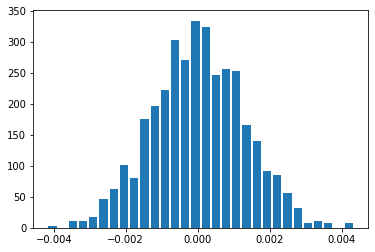

In [30]:
s0 = s - np.pi/4.
plot_density(s0, sample_range=[s0.min(), s0.max()]);
print(s0.std())

In [47]:
def mcpi(N):
    X = np.random.uniform(-1, 1, size=N)
    Y = np.random.uniform(-1, 1, size=N)
    d = X**2 + Y**2
    d = d <= 1
    pihat = d.sum() / N
    ss = d.std()  # sample std, simply!
    se = d.std() / np.sqrt(N)  # standard error = the std of the pihat
    re = ( pihat - (np.pi/4.) ) / (np.pi/4.)  # relative error
    return pihat, se, re, ss

# throws = 10000000
# Ns = range(10000, throws, 100000)

a = range(2, 9, 1); print('a:', list(a))
Ns = np.power(10, a)

pihats, ses, res, sstds = [], [], [], []
for thr in Ns:
    print(thr)
    p, s, r, ss = mcpi(thr)
    pihats.append(p)
    ses.append(s)
    res.append(r)
    sstds.append(ss)

a: [2, 3, 4, 5, 6, 7, 8]
100
1000
10000
100000
1000000
10000000
100000000


In [48]:
pihats = np.array(pihats)
ses = np.array(ses)
res = np.array(res)
sstds = np.array(sstds)

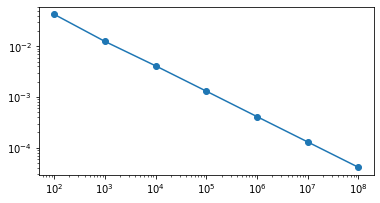

In [49]:
plt.plot(Ns, ses, '-o')
plt.yscale('log')
plt.xscale('log')
plt.gca().set_aspect('equal')

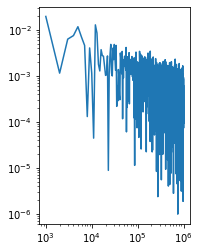

In [ ]:
plt.plot(Ns, np.abs(res))
plt.yscale('log')
plt.xscale('log')
plt.gca().set_aspect('equal')

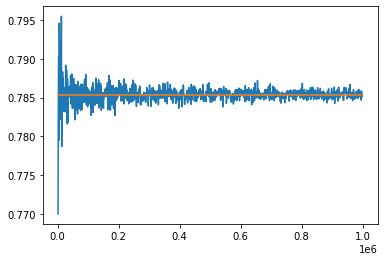

In [ ]:
plt.plot(Ns, pihats)
plt.plot(Ns, [np.pi/4]*len(Ns))